# 嵌入式系统开发的流程概述

嵌入式系统开发一般分为软件开发和硬件开发。
嵌入式系统开发的过程一般采用宿主机/目标板开发模式。利用宿主机上(PC)上丰富的软硬件资源

# 项目需求

> 实现的功能

向用户提供一个web页面让用户查看采集到的视频信息和温度、湿度、光照等数据。用户还可以通过web页面控制设备上的硬件。
   
> 功能实现的软硬件需求
   
   | 功能 | 硬件/软件 |
   | ---- | ----------|
   | 要能采集视频信息 | 摄像头 |
   | 要能获取温度、湿度、光照等数据 | 温湿度传感器、光照传感器 |
   | 需要实现无线信息采集 | 需要硬件：无线模块 |
   | 要能同时处理视频任务、终端信息采集任务、终端硬件控制任务的多任务控制设备| 一个可裁剪的计算机设备（MCU）并搭载操作系统 | 
   | 要有一个网络服务器，让用户通过浏览器访问 | 网络服务器 |
   | 需要实现网络和硬件的交互 | 网络通信协议 |
   | 需要实现硬件和软件的交互 | 驱动 | 
   | 需要实现无线的终端信息采集 | 无线传输协议 |


# 实现方案拟定

| 软硬件 | 具体实现方案 |
| ------- | --------- |
| 嵌入式设备 | 搭载采用ARM-A9架构的三星exynos4412芯片的开发板FS4412 |
| 操作系统 | Linux 3.14 |
| 网络服务器 | BOA服务器 |
| 网络通讯协议 | CGI 通讯协议 |
| 视频流采集和上传 | 视频流服务器 |

# 开发环境搭建

## 用于开发的机器中相关工具的准备
1. 一些必要的库 
   
```kernel
    sudo apt-get install gcc g++ binutils patch bzip2 flex bison make autoconf gettext texinfo unzip sharutils ncurses-term zlib1g-dev libncurses5-dev gawk subversion libz-dev
```
2. 交叉编译环境搭建
3. tftp 服务器搭建
4. nfs 服务器搭建
5. 配置网络连接
   添加一个有线网络连接

   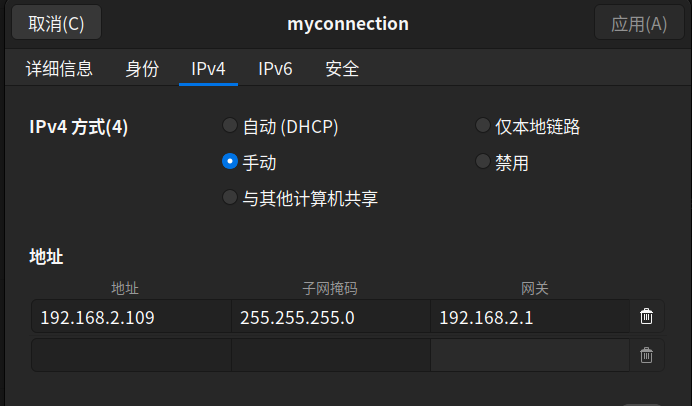
 

  
## 向 FS4412 开发板上移植linux3.14操作系统 ---- 系统移植
 
1. 移植Uboot
    
    使用版本Uboot 2013.01
    + 为fs4412开发板配置和编译Uboot
    + 使用 SD 卡刷入 uboot 程序以制作启动盘
    + uboot 环境变量设置
  
2. linux内核源码的配置、编译和移植
3. 设备树编译和移植
4. linux 内核驱动移植
5. 根文件系统移植


## 向 FS4412 开发板上移植BOA服务器

1. 获取boa源码
2. 运行src目录下./configure 生成makefile等文件
3. make 编译源码
   1. 在宿主机上移植 直接make 即可
   2. 在目标板上移植 修改Makefile的编译工具
4. 建立安装目录
5. 将编译生成的相关需要的文件拷贝到安装目录下
6. 修改boa.conf文件
7. 建立测试html和cgi文件
8. 运行./boa
9. 浏览器访问服务器的ip地址

# CGI的移植

# mjpeg-streamer 移植

> 1. 确定摄像头的类型

"摄像头是否支持UVC"是指摄像头是否支持USB Video Class（UVC）协议。
UVC的主要特点是"即插即用"，也就是说，您可以将摄像头连接到兼容的系统（如Windows、Linux、macOS等），而无需为特定摄像头安装专门的驱动程序。UVC标准为操作系统提供了一个通用的驱动接口，使摄像头制造商能够生产不需要特定驱动程序的摄像头。
如果你想查看自己的摄像头是否支持UVC，可以通过以下步骤：
    把摄像头插入PC机的USB接口，查看ID。
    在Linux类操作系统下插入USB摄像头，用dmesg打印信息。
    在Windows操作系统下插入USB摄像头插入，打开设备管理器，查看硬件ID。

> 2. 移植USB驱动
> 3. 移植jpeg库
    
获取jpeg库源码

修改configure文件以配置源码(指定最终生成的库文件和头文件的存放目录)

编译，安装，将生成的lib库文件拷贝到开发板根文件系统下

> 4. 移植mjpg-streamer

获取mjpg-streamer源码

修改makefile文件，指定jpeg库和头文件的路径

编译生成可执行文件

在开发板根文件系统下拷贝可执行文件和库文件